#**E-Commerce Customer Behaviour Analytics & Predictive Modeling**

## Load and Initial Data Inspection


In [14]:
import pandas as pd

df = pd.read_csv('E-commerce.csv')

print('First 5 rows of the DataFrame:')
print(df.head())

print('\nShape of the DataFrame:')
print(df.shape)

print('\nData types of each column:')
df.info()

print('\nMissing values in each column:')
print(df.isnull().sum())

First 5 rows of the DataFrame:
   Customer ID  Age  Gender Location  Annual Income  \
0         1001   25  Female   City D          45000   
1         1001   28  Female   City D          52000   
2         1001   28  Female   City D          65000   
3         1001   45  Female   City D          70000   
4         1002   34    Male   City E          45000   

                                    Purchase History  \
0  [{"Date": "2022-03-05", "Category": "Clothing"...   
1  [{"Product Category": "Clothing", "Purchase Da...   
2  [{"Product Category": "Electronics", "Purchase...   
3  {'Purchase Date': '2022-08-15', 'Product Categ...   
4  {'Purchase Date': '2022-07-25', 'Product Categ...   

                                    Browsing History  \
0  [{"Timestamp": "2022-03-10T14:30:00Z"}, {"Time...   
1  [{"Product Category": "Home & Garden", "Timest...   
2  [{"Product Category": "Clothing", "Timestamp":...   
3               {'Timestamp': '2022-09-03 14:30:00'}   
4               {'Tim

## Data Cleaning and Preprocessing



In [15]:
print(f"Initial number of rows: {df.shape[0]}")
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Initial number of rows: 50
Number of rows after removing duplicates: 50


In [16]:
import ast

def safe_literal_eval(val):
    try:
        return ast.literal_eval(val)
    except (ValueError, SyntaxError):
        return val

for col in ['Purchase History', 'Browsing History', 'Product Reviews']:
    df[col] = df[col].apply(safe_literal_eval)

print("Data types after attempting conversion of structured string columns:")
df.info()

Data types after attempting conversion of structured string columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer ID       50 non-null     int64  
 1   Age               50 non-null     int64  
 2   Gender            50 non-null     object 
 3   Location          50 non-null     object 
 4   Annual Income     50 non-null     int64  
 5   Purchase History  50 non-null     object 
 6   Browsing History  50 non-null     object 
 7   Product Reviews   50 non-null     object 
 8   Time on Site      50 non-null     float64
dtypes: float64(1), int64(3), object(5)
memory usage: 3.6+ KB


In [17]:
import numpy as np

def extract_and_convert_date(purchase_history_entry):
    if isinstance(purchase_history_entry, list):
        for item in purchase_history_entry:
            if isinstance(item, dict):
                if 'Date' in item:
                    return item['Date']
                elif 'Purchase Date' in item:
                    return item['Purchase Date']
    elif isinstance(purchase_history_entry, dict):
        if 'Date' in purchase_history_entry:
            return purchase_history_entry['Date']
        elif 'Purchase Date' in purchase_history_entry:
            return purchase_history_entry['Purchase Date']
    return None

df['Purchase Date String'] = df['Purchase History'].apply(extract_and_convert_date)

df['First Purchase Date'] = pd.to_datetime(df['Purchase Date String'], errors='coerce')

df.drop(columns=['Purchase Date String'], inplace=True)

print("DataFrame with new 'First Purchase Date' column and its data type:")
df.info()
print("\nFirst 5 rows of 'Customer ID' and 'First Purchase Date' columns:")
print(df[['Customer ID', 'First Purchase Date']].head())

DataFrame with new 'First Purchase Date' column and its data type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Customer ID          50 non-null     int64         
 1   Age                  50 non-null     int64         
 2   Gender               50 non-null     object        
 3   Location             50 non-null     object        
 4   Annual Income        50 non-null     int64         
 5   Purchase History     50 non-null     object        
 6   Browsing History     50 non-null     object        
 7   Product Reviews      50 non-null     object        
 8   Time on Site         50 non-null     float64       
 9   First Purchase Date  17 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 4.0+ KB

First 5 rows of 'Customer ID' and 'First Purchase Date' columns:

In [18]:
print("\nMissing values in each column after preprocessing:")
print(df.isnull().sum())


Missing values in each column after preprocessing:
Customer ID             0
Age                     0
Gender                  0
Location                0
Annual Income           0
Purchase History        0
Browsing History        0
Product Reviews         0
Time on Site            0
First Purchase Date    33
dtype: int64


## Feature Engineering



In [19]:
def calculate_customer_total_sales(purchase_history_entry):
    total_sales = 0
    if isinstance(purchase_history_entry, dict):
        items = [purchase_history_entry]
    elif isinstance(purchase_history_entry, list):
        items = purchase_history_entry
    else:
        return 0

    for item in items:
        if not isinstance(item, dict):
            continue

        price = 0
        quantity = 1

        if 'Price' in item:
            try:
                price = float(item['Price'])
            except (ValueError, TypeError):
                price = 0
        elif 'price' in item:
             try:
                price = float(item['price'])
             except (ValueError, TypeError):
                price = 0

        if 'Quantity' in item:
            try:
                quantity = int(item['Quantity'])
            except (ValueError, TypeError):
                quantity = 1
        elif 'quantity' in item:
            try:
                quantity = int(item['quantity'])
            except (ValueError, TypeError):
                quantity = 1

        total_sales += price * quantity
    return total_sales

df['CustomerTotalSales'] = df['Purchase History'].apply(calculate_customer_total_sales)

df['PurchaseYear'] = df['First Purchase Date'].dt.year.replace({pd.NA: np.nan})
df['PurchaseMonth'] = df['First Purchase Date'].dt.month.replace({pd.NA: np.nan})

print("First 5 rows with new 'CustomerTotalSales', 'PurchaseYear', and 'PurchaseMonth' columns:")
print(df[['CustomerTotalSales', 'PurchaseYear', 'PurchaseMonth']].head())

print("\nDataFrame info after creating new features:")
df.info()

First 5 rows with new 'CustomerTotalSales', 'PurchaseYear', and 'PurchaseMonth' columns:
   CustomerTotalSales  PurchaseYear  PurchaseMonth
0              194.97        2022.0            3.0
1              185.55        2022.0            5.0
2              625.49        2022.0            8.0
3                0.00           NaN            NaN
4                0.00           NaN            NaN

DataFrame info after creating new features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Customer ID          50 non-null     int64         
 1   Age                  50 non-null     int64         
 2   Gender               50 non-null     object        
 3   Location             50 non-null     object        
 4   Annual Income        50 non-null     int64         
 5   Purchase History     50 non-null     object        
 

## Exploratory Data Analysis (EDA)



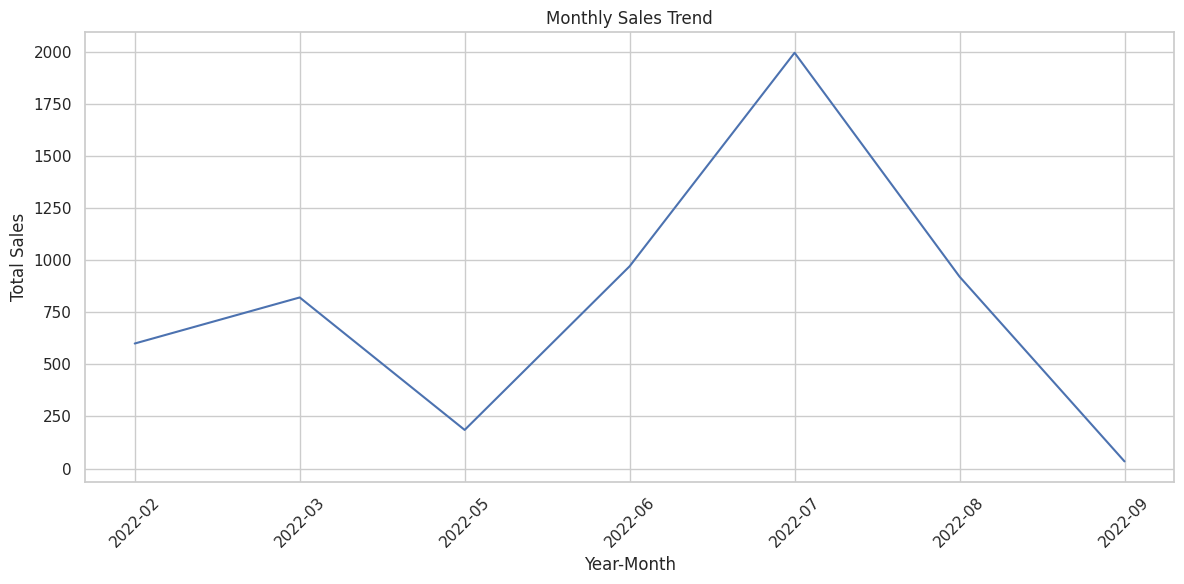

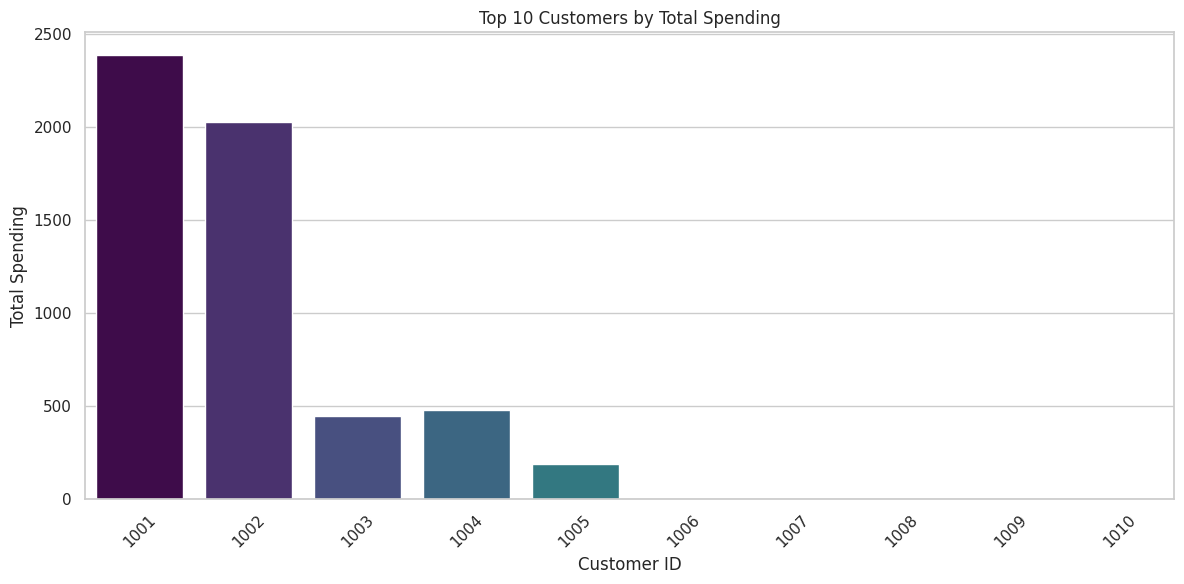

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

monthly_sales = df.dropna(subset=['PurchaseYear', 'PurchaseMonth']).groupby(['PurchaseYear', 'PurchaseMonth'])['CustomerTotalSales'].sum().reset_index()

monthly_sales['PurchaseYear'] = monthly_sales['PurchaseYear'].astype(int)
monthly_sales['PurchaseMonth'] = monthly_sales['PurchaseMonth'].astype(int)

monthly_sales = monthly_sales.sort_values(by=['PurchaseYear', 'PurchaseMonth'])

monthly_sales['YearMonth'] = monthly_sales['PurchaseYear'].astype(str) + '-' + monthly_sales['PurchaseMonth'].astype(str).str.zfill(2)

plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='CustomerTotalSales', data=monthly_sales)

plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

customer_total_spending = df.groupby('Customer ID')['CustomerTotalSales'].sum().reset_index()

top_10_customers = customer_total_spending.sort_values(by='CustomerTotalSales', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Customer ID', y='CustomerTotalSales', data=top_10_customers, palette='viridis', hue='Customer ID', legend=False)

plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Statistical Analysis




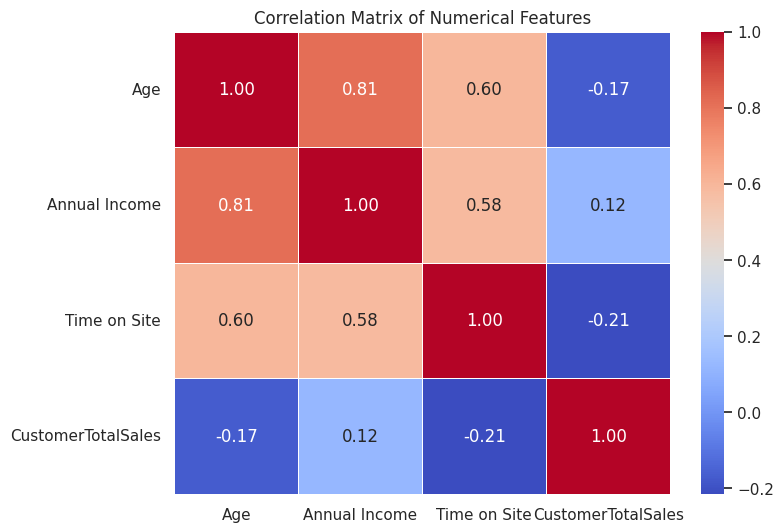

In [22]:
numerical_features = ['Age', 'Annual Income', 'Time on Site', 'CustomerTotalSales']
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [23]:
from scipy import stats

male_sales = df[df['Gender'] == 'Male']['CustomerTotalSales']
female_sales = df[df['Gender'] == 'Female']['CustomerTotalSales']

t_stat, p_value = stats.ttest_ind(male_sales, female_sales, equal_var=False)

print(f"\nT-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.3f}")

significance_level = 0.05
if p_value < significance_level:
    print(f"Based on the p-value ({p_value:.3f}) < {significance_level}, we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant difference in mean CustomerTotalSales between male and female customers.")
else:
    print(f"Based on the p-value ({p_value:.3f}) >= {significance_level}, we fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant difference in mean CustomerTotalSales between male and female customers.")

print("\nMean CustomerTotalSales by Gender:")
print(df.groupby('Gender')['CustomerTotalSales'].mean())
print("\nStandard Deviation of CustomerTotalSales by Gender:")
print(df.groupby('Gender')['CustomerTotalSales'].std())


T-statistic: 0.20
P-value: 0.843
Based on the p-value (0.843) >= 0.05, we fail to reject the null hypothesis.
Conclusion: There is no statistically significant difference in mean CustomerTotalSales between male and female customers.

Mean CustomerTotalSales by Gender:
Gender
Female    110.343462
Male      123.064444
Other      74.163333
Name: CustomerTotalSales, dtype: float64

Standard Deviation of CustomerTotalSales by Gender:
Gender
Female    174.729970
Male      226.694249
Other     117.317007
Name: CustomerTotalSales, dtype: float64


## SQL Database Integration and Querying




In [25]:
def extract_purchase_details(row):
    customer_id = row['Customer ID']
    purchase_history = row['Purchase History']
    details = []

    if isinstance(purchase_history, dict):
        items = [purchase_history]
    elif isinstance(purchase_history, list):
        items = purchase_history
    else:
        return []

    for item in items:
        if isinstance(item, dict):
            category = item.get('Product Category', item.get('Category', 'Unknown Category'))

            product_name = item.get('Product Name', item.get('Product', 'Unknown Product'))

            price = 0
            try:
                price = float(item.get('Price', item.get('price', 0)))
            except (ValueError, TypeError):
                pass

            quantity = 1
            try:
                quantity = int(item.get('Quantity', item.get('quantity', 1)))
            except (ValueError, TypeError):
                pass

            details.append({
                'Customer ID': customer_id,
                'Product Category': category,
                'Product Name': product_name,
                'Price': price,
                'Quantity': quantity
            })
    return details

purchase_details_list = df.apply(extract_purchase_details, axis=1).explode().tolist()

purchase_details_list = [d for d in purchase_details_list if isinstance(d, dict)]

df_purchases = pd.DataFrame(purchase_details_list)

print("First 5 rows of df_purchases:")
print(df_purchases.head())
print("\nShape of df_purchases:")
print(df_purchases.shape)
print("\nData types of df_purchases columns:")
df_purchases.info()

First 5 rows of df_purchases:
   Customer ID Product Category     Product Name   Price  Quantity
0         1001         Clothing  Unknown Product   34.99         1
1         1001      Electronics  Unknown Product  129.99         1
2         1001    Home & Garden  Unknown Product   29.99         1
3         1001         Clothing  Unknown Product   34.56         1
4         1001      Electronics  Unknown Product  150.99         1

Shape of df_purchases:
(35, 5)

Data types of df_purchases columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer ID       35 non-null     int64  
 1   Product Category  35 non-null     object 
 2   Product Name      35 non-null     object 
 3   Price             35 non-null     float64
 4   Quantity          35 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.5+ KB


In [28]:
import sqlite3
import json
import pandas as pd
import numpy as np

conn = sqlite3.connect(':memory:')
df_sql = df.copy()

for col in ['Purchase History', 'Browsing History', 'Product Reviews']:
    df_sql[col] = df_sql[col].apply(lambda x: json.dumps(x) if x is not None and not isinstance(x, str) else x)

df_sql['First Purchase Date'] = df_sql['First Purchase Date'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S') if pd.notna(x) else None)

df_sql['PurchaseYear'] = df_sql['PurchaseYear'].replace({np.nan: None})
df_sql['PurchaseMonth'] = df_sql['PurchaseMonth'].replace({np.nan: None})

df_sql.to_sql('customers', conn, if_exists='replace', index=False)

print("DataFrame 'df' loaded into SQLite table 'customers'.")

DataFrame 'df' loaded into SQLite table 'customers'.


**Reasoning**:
I will now load the `df_purchases` DataFrame into a new SQL table named `purchases` in the existing SQLite database connection. This addresses the fourth instruction of the subtask.



In [29]:
df_purchases.to_sql('purchases', conn, if_exists='replace', index=False)

print("DataFrame 'df_purchases' loaded into SQLite table 'purchases'.")

DataFrame 'df_purchases' loaded into SQLite table 'purchases'.


In [30]:
query_top_customers = """
SELECT "Customer ID", CustomerTotalSales
FROM customers
ORDER BY CustomerTotalSales DESC
LIMIT 10
"""
top_customers_sql = pd.read_sql_query(query_top_customers, conn)

print("Top 10 Customers by Total Sales (SQL Query):")
print(top_customers_sql)

Top 10 Customers by Total Sales (SQL Query):
   Customer ID  CustomerTotalSales
0         1002              695.00
1         1001              625.49
2         1002              600.20
3         1004              479.98
4         1002              379.98
5         1001              376.30
6         1002              350.00
7         1001              295.57
8         1003              260.00
9         1001              249.99


In [31]:
query_top_products = """
SELECT "Product Category", SUM(Price * Quantity) AS TotalSales
FROM purchases
GROUP BY "Product Category"
ORDER BY TotalSales DESC
LIMIT 10
"""
top_products_sql = pd.read_sql_query(query_top_products, conn)

print("Top 10 Products/Product Categories by Total Sales (SQL Query):")
print(top_products_sql)

Top 10 Products/Product Categories by Total Sales (SQL Query):
  Product Category  TotalSales
0      Electronics     3177.27
1    Home & Garden     1614.95
2         Clothing      736.85


In [32]:
query_location_revenue = """
SELECT Location, SUM(CustomerTotalSales) AS TotalRevenue
FROM customers
GROUP BY Location
ORDER BY TotalRevenue DESC
"""
location_revenue_sql = pd.read_sql_query(query_location_revenue, conn)

print("Location-wise Revenue Analysis (SQL Query):")
print(location_revenue_sql)

Location-wise Revenue Analysis (SQL Query):
   Location  TotalRevenue
0    City D       2388.95
1    City E       2025.18
2    City G        479.98
3    City F        444.98
4    City H        189.98
5    City P          0.00
6    City O          0.00
7    City N          0.00
8    City M          0.00
9    City L          0.00
10   City K          0.00
11   City J          0.00
12   City I          0.00
13   City C          0.00
14   City B          0.00
15   City A          0.00


## Predictive Modeling - Sales Forecasting (Regression)




In [33]:
selected_features = ['Age', 'Annual Income', 'Time on Site', 'PurchaseYear', 'PurchaseMonth']
X = df[selected_features]
y = df['CustomerTotalSales']

print("Missing values in selected features (X):")
print(X.isnull().sum())

print("\nMissing values in target variable (y):")
print(y.isnull().sum())

Missing values in selected features (X):
Age               0
Annual Income     0
Time on Site      0
PurchaseYear     33
PurchaseMonth    33
dtype: int64

Missing values in target variable (y):
0


In [34]:
for col in ['PurchaseYear', 'PurchaseMonth']:
    if X[col].isnull().any():
        mode_val = X[col].mode()[0]
        X[col] = X[col].fillna(mode_val)

print("Missing values in selected features (X) after imputation:")
print(X.isnull().sum())


Missing values in selected features (X) after imputation:
Age              0
Annual Income    0
Time on Site     0
PurchaseYear     0
PurchaseMonth    0
dtype: int64


/tmp/ipython-input-4271050804.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].fillna(mode_val)


In [35]:
for col in ['PurchaseYear', 'PurchaseMonth']:
    if X[col].isnull().any():
        mode_val = X[col].mode()[0]
        X.loc[:, col] = X[col].fillna(mode_val)

print("Missing values in selected features (X) after imputation:")
print(X.isnull().sum())

Missing values in selected features (X) after imputation:
Age              0
Annual Income    0
Time on Site     0
PurchaseYear     0
PurchaseMonth    0
dtype: int64


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (40, 5)
Shape of X_test: (10, 5)
Shape of y_train: (40,)
Shape of y_test: (10,)


In [37]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

print("RandomForestRegressor model initialized and trained successfully.")

RandomForestRegressor model initialized and trained successfully.


In [38]:
y_pred = model.predict(X_test)

print("Predictions made on the test set.")

Predictions made on the test set.


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 169.52
Mean Squared Error (MSE): 68979.04
Root Mean Squared Error (RMSE): 262.64
R-squared (R2): -0.12


## Predictive Modeling - Customer Classification




In [40]:
sales_threshold = df['CustomerTotalSales'].quantile(0.75)
df['HighValueCustomer'] = (df['CustomerTotalSales'] > sales_threshold).astype(int)

print(f"75th percentile of CustomerTotalSales: {sales_threshold:.2f}")
print("Distribution of HighValueCustomer:")
print(df['HighValueCustomer'].value_counts())
print("\nFirst 5 rows with 'CustomerTotalSales' and 'HighValueCustomer':")
print(df[['CustomerTotalSales', 'HighValueCustomer']].head())

75th percentile of CustomerTotalSales: 188.87
Distribution of HighValueCustomer:
HighValueCustomer
0    37
1    13
Name: count, dtype: int64

First 5 rows with 'CustomerTotalSales' and 'HighValueCustomer':
   CustomerTotalSales  HighValueCustomer
0              194.97                  1
1              185.55                  0
2              625.49                  1
3                0.00                  0
4                0.00                  0


In [41]:
numerical_features_clf = ['Age', 'Annual Income', 'Time on Site', 'PurchaseYear', 'PurchaseMonth']
categorical_features_clf = ['Gender', 'Location']

features_for_classification = numerical_features_clf + categorical_features_clf

X_clf = df[features_for_classification]
y_clf = df['HighValueCustomer']

print("Selected features for classification (X_clf) head:")
print(X_clf.head())
print("\nTarget variable for classification (y_clf) head:")
print(y_clf.head())

print("\nMissing values in selected features (X_clf):")
print(X_clf.isnull().sum())

Selected features for classification (X_clf) head:
   Age  Annual Income  Time on Site  PurchaseYear  PurchaseMonth  Gender  \
0   25          45000         32.50        2022.0            3.0  Female   
1   28          52000        123.45        2022.0            5.0  Female   
2   28          65000        125.60        2022.0            8.0  Female   
3   45          70000        327.60           NaN            NaN  Female   
4   34          45000        214.90           NaN            NaN    Male   

  Location  
0   City D  
1   City D  
2   City D  
3   City D  
4   City E  

Target variable for classification (y_clf) head:
0    1
1    0
2    1
3    0
4    0
Name: HighValueCustomer, dtype: int64

Missing values in selected features (X_clf):
Age               0
Annual Income     0
Time on Site      0
PurchaseYear     33
PurchaseMonth    33
Gender            0
Location          0
dtype: int64


In [42]:
for col in ['PurchaseYear', 'PurchaseMonth']:
    if X_clf[col].isnull().any():
        mode_val = X_clf[col].mode()[0]
        X_clf.loc[:, col] = X_clf[col].fillna(mode_val)

print("Missing values in selected features (X_clf) after imputation:")
print(X_clf.isnull().sum())

Missing values in selected features (X_clf) after imputation:
Age              0
Annual Income    0
Time on Site     0
PurchaseYear     0
PurchaseMonth    0
Gender           0
Location         0
dtype: int64


In [43]:
X_clf_encoded = pd.get_dummies(X_clf, columns=categorical_features_clf, drop_first=True)

print("First 5 rows of X_clf after one-hot encoding:")
print(X_clf_encoded.head())
print("\nShape of X_clf after one-hot encoding:")
print(X_clf_encoded.shape)
print("\nData types of X_clf_encoded columns:")
X_clf_encoded.info()

First 5 rows of X_clf after one-hot encoding:
   Age  Annual Income  Time on Site  PurchaseYear  PurchaseMonth  Gender_Male  \
0   25          45000         32.50        2022.0            3.0        False   
1   28          52000        123.45        2022.0            5.0        False   
2   28          65000        125.60        2022.0            8.0        False   
3   45          70000        327.60        2022.0            7.0        False   
4   34          45000        214.90        2022.0            7.0         True   

   Gender_Other  Location_City B  Location_City C  Location_City D  ...  \
0         False            False            False             True  ...   
1         False            False            False             True  ...   
2         False            False            False             True  ...   
3         False            False            False             True  ...   
4         False            False            False            False  ...   

   Location_City

In [44]:
X = X_clf_encoded
y = y_clf

print("Features (X) and target (y) are now separated.")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Features (X) and target (y) are now separated.
Shape of X: (50, 22)
Shape of y: (50,)


In [45]:
from sklearn.model_selection import train_test_split

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train_clf: {X_train_clf.shape}")
print(f"Shape of X_test_clf: {X_test_clf.shape}")
print(f"Shape of y_train_clf: {y_train_clf.shape}")
print(f"Shape of y_test_clf: {y_test_clf.shape}")

Shape of X_train_clf: (40, 22)
Shape of X_test_clf: (10, 22)
Shape of y_train_clf: (40,)
Shape of y_test_clf: (10,)


In [46]:
from sklearn.linear_model import LogisticRegression


model_clf = LogisticRegression(random_state=42, solver='liblinear')

print("LogisticRegression model initialized successfully.")

LogisticRegression model initialized successfully.


In [47]:
model_clf.fit(X_train_clf, y_train_clf)

print("LogisticRegression model trained successfully on the training data.")

LogisticRegression model trained successfully on the training data.


In [48]:
y_pred_clf = model_clf.predict(X_test_clf)

print("Predictions made on the classification test set.")

Predictions made on the classification test set.


In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf)
recall = recall_score(y_test_clf, y_pred_clf)
f1 = f1_score(y_test_clf, y_pred_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

print(f"\nClassification Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")


Classification Model Evaluation Metrics:
Accuracy: 0.50
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
Confusion Matrix:
[[5 1]
 [4 0]]
